# Mahalonobis Distance

In [5]:
from data.utils.NCBI.data_loader import NCBIDataLoader
# from data.utils.HGTREE.data_loader import HGTREEDataLoader
# test out combination

In [6]:
aquifex_aeolicus_VF5 = NCBIDataLoader('AE000657')

In [2]:
# load bsub
bascillus_subtillis = NCBIDataLoader('AL009126.3')

In [3]:
# load ecoli k12
eschericia_coli_k12 = NCBIDataLoader('U00096.3')

In [8]:
import numpy as np
from random import choices,choice
from data.utils.NCBI.metrics.calc_cub import calc_cub
import matplotlib.pyplot as plt

## montecarlo procedure

In [13]:
CODE = {
    'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
    'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
    'tta': 'L', 'tca': 'S', 'taa': '*', 'tga': '*',
    'ttg': 'L', 'tcg': 'S', 'tag': '*', 'tgg': 'W',
    'ctt': 'L', 'cct': 'P', 'cat': 'H', 'cgt': 'R',
    'ctc': 'L', 'ccc': 'P', 'cac': 'H', 'cgc': 'R',
    'cta': 'L', 'cca': 'P', 'caa': 'Q', 'cga': 'R',
    'ctg': 'L', 'ccg': 'P', 'cag': 'Q', 'cgg': 'R',
    'att': 'I', 'act': 'T', 'aat': 'N', 'agt': 'S',
    'atc': 'I', 'acc': 'T', 'aac': 'N', 'agc': 'S',
    'ata': 'I', 'aca': 'T', 'aaa': 'K', 'aga': 'R',
    'atg': 'M', 'acg': 'T', 'aag': 'K', 'agg': 'R',
    'gtt': 'V', 'gct': 'A', 'gat': 'D', 'ggt': 'G',
    'gtc': 'V', 'gcc': 'A', 'gac': 'D', 'ggc': 'G',
    'gta': 'V', 'gca': 'A', 'gaa': 'E', 'gga': 'G',
    'gtg': 'V', 'gcg': 'A', 'gag': 'E', 'ggg': 'G'
}

In [6]:
CODE_COVARMAT = {
    'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
    'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
    'tta': 'L', 'tca': 'S', 'ttg': 'L', 'tcg': 'S',
    'tgg': 'W', 'ctt': 'L', 'cct': 'P', 'cat': 'H',
    'cgt': 'R', 'ctc': 'L', 'ccc': 'P', 'cac': 'H',
    'cgc': 'R', 'cta': 'L', 'cca': 'P', 'caa': 'Q',
    'cga': 'R', 'ctg': 'L', 'ccg': 'P', 'cag': 'Q',
    'cgg': 'R', 'att': 'I', 'act': 'T', 'aat': 'N',
    'agt': 'S', 'atc': 'I', 'acc': 'T', 'aac': 'N',
    'agc': 'S', 'ata': 'I', 'aca': 'T', 'aaa': 'K',
    'aga': 'R', 'atg': 'M', 'acg': 'T', 'aag': 'K',
    'agg': 'R', 'gtt': 'V', 'gct': 'A', 'gat': 'D',
    'ggt': 'G', 'gtc': 'V', 'gcc': 'A', 'gac': 'D',
    'ggc': 'G', 'gta': 'V', 'gca': 'A', 'gaa': 'E',
    'gga': 'G', 'gtg': 'V', 'gcg': 'A', 'gag': 'E',
    'ggg': 'G'
}

In [7]:
# current random dna generator
def random_dna_sequence_v2(genome, length):
  if length%3!=0:
    raise ValueError('length needs to be disvisible by 3!')
  
  weights = []
  for i in CODE_COVARMAT:    
      mu, sigma = genome.mean_cub[i.upper()], genome.std_cub[i.upper()]
      s = np.random.normal(mu, sigma, 1)
      weights.append(s)
  list_of_cds = choices([cds.upper() for cds in CODE_COVARMAT.keys()], weights=weights, k=length)
  DNA=""
  for cds in list_of_cds:
    DNA+=cds
  return DNA

In [9]:
def plot_distribution_cub_generated(list_of_random_dnas):
    codon_count_list = {}
    for code in CODE:
        codon_count_list[code.upper()]=[]
        
    for dna in list_of_random_dnas:
        current_random_dna_cub = calc_cub(dna)
        for code in CODE:
            codon_count_list[code.upper()].append(current_random_dna_cub[code.upper()])
    fig = plt.figure(figsize=(30,50))
    for i,code in enumerate(CODE):
        ax = fig.add_subplot(16, 4, i+1)
        ax.set_title(code)
        ax.hist(codon_count_list[code.upper()],list(set(codon_count_list[code.upper()])))

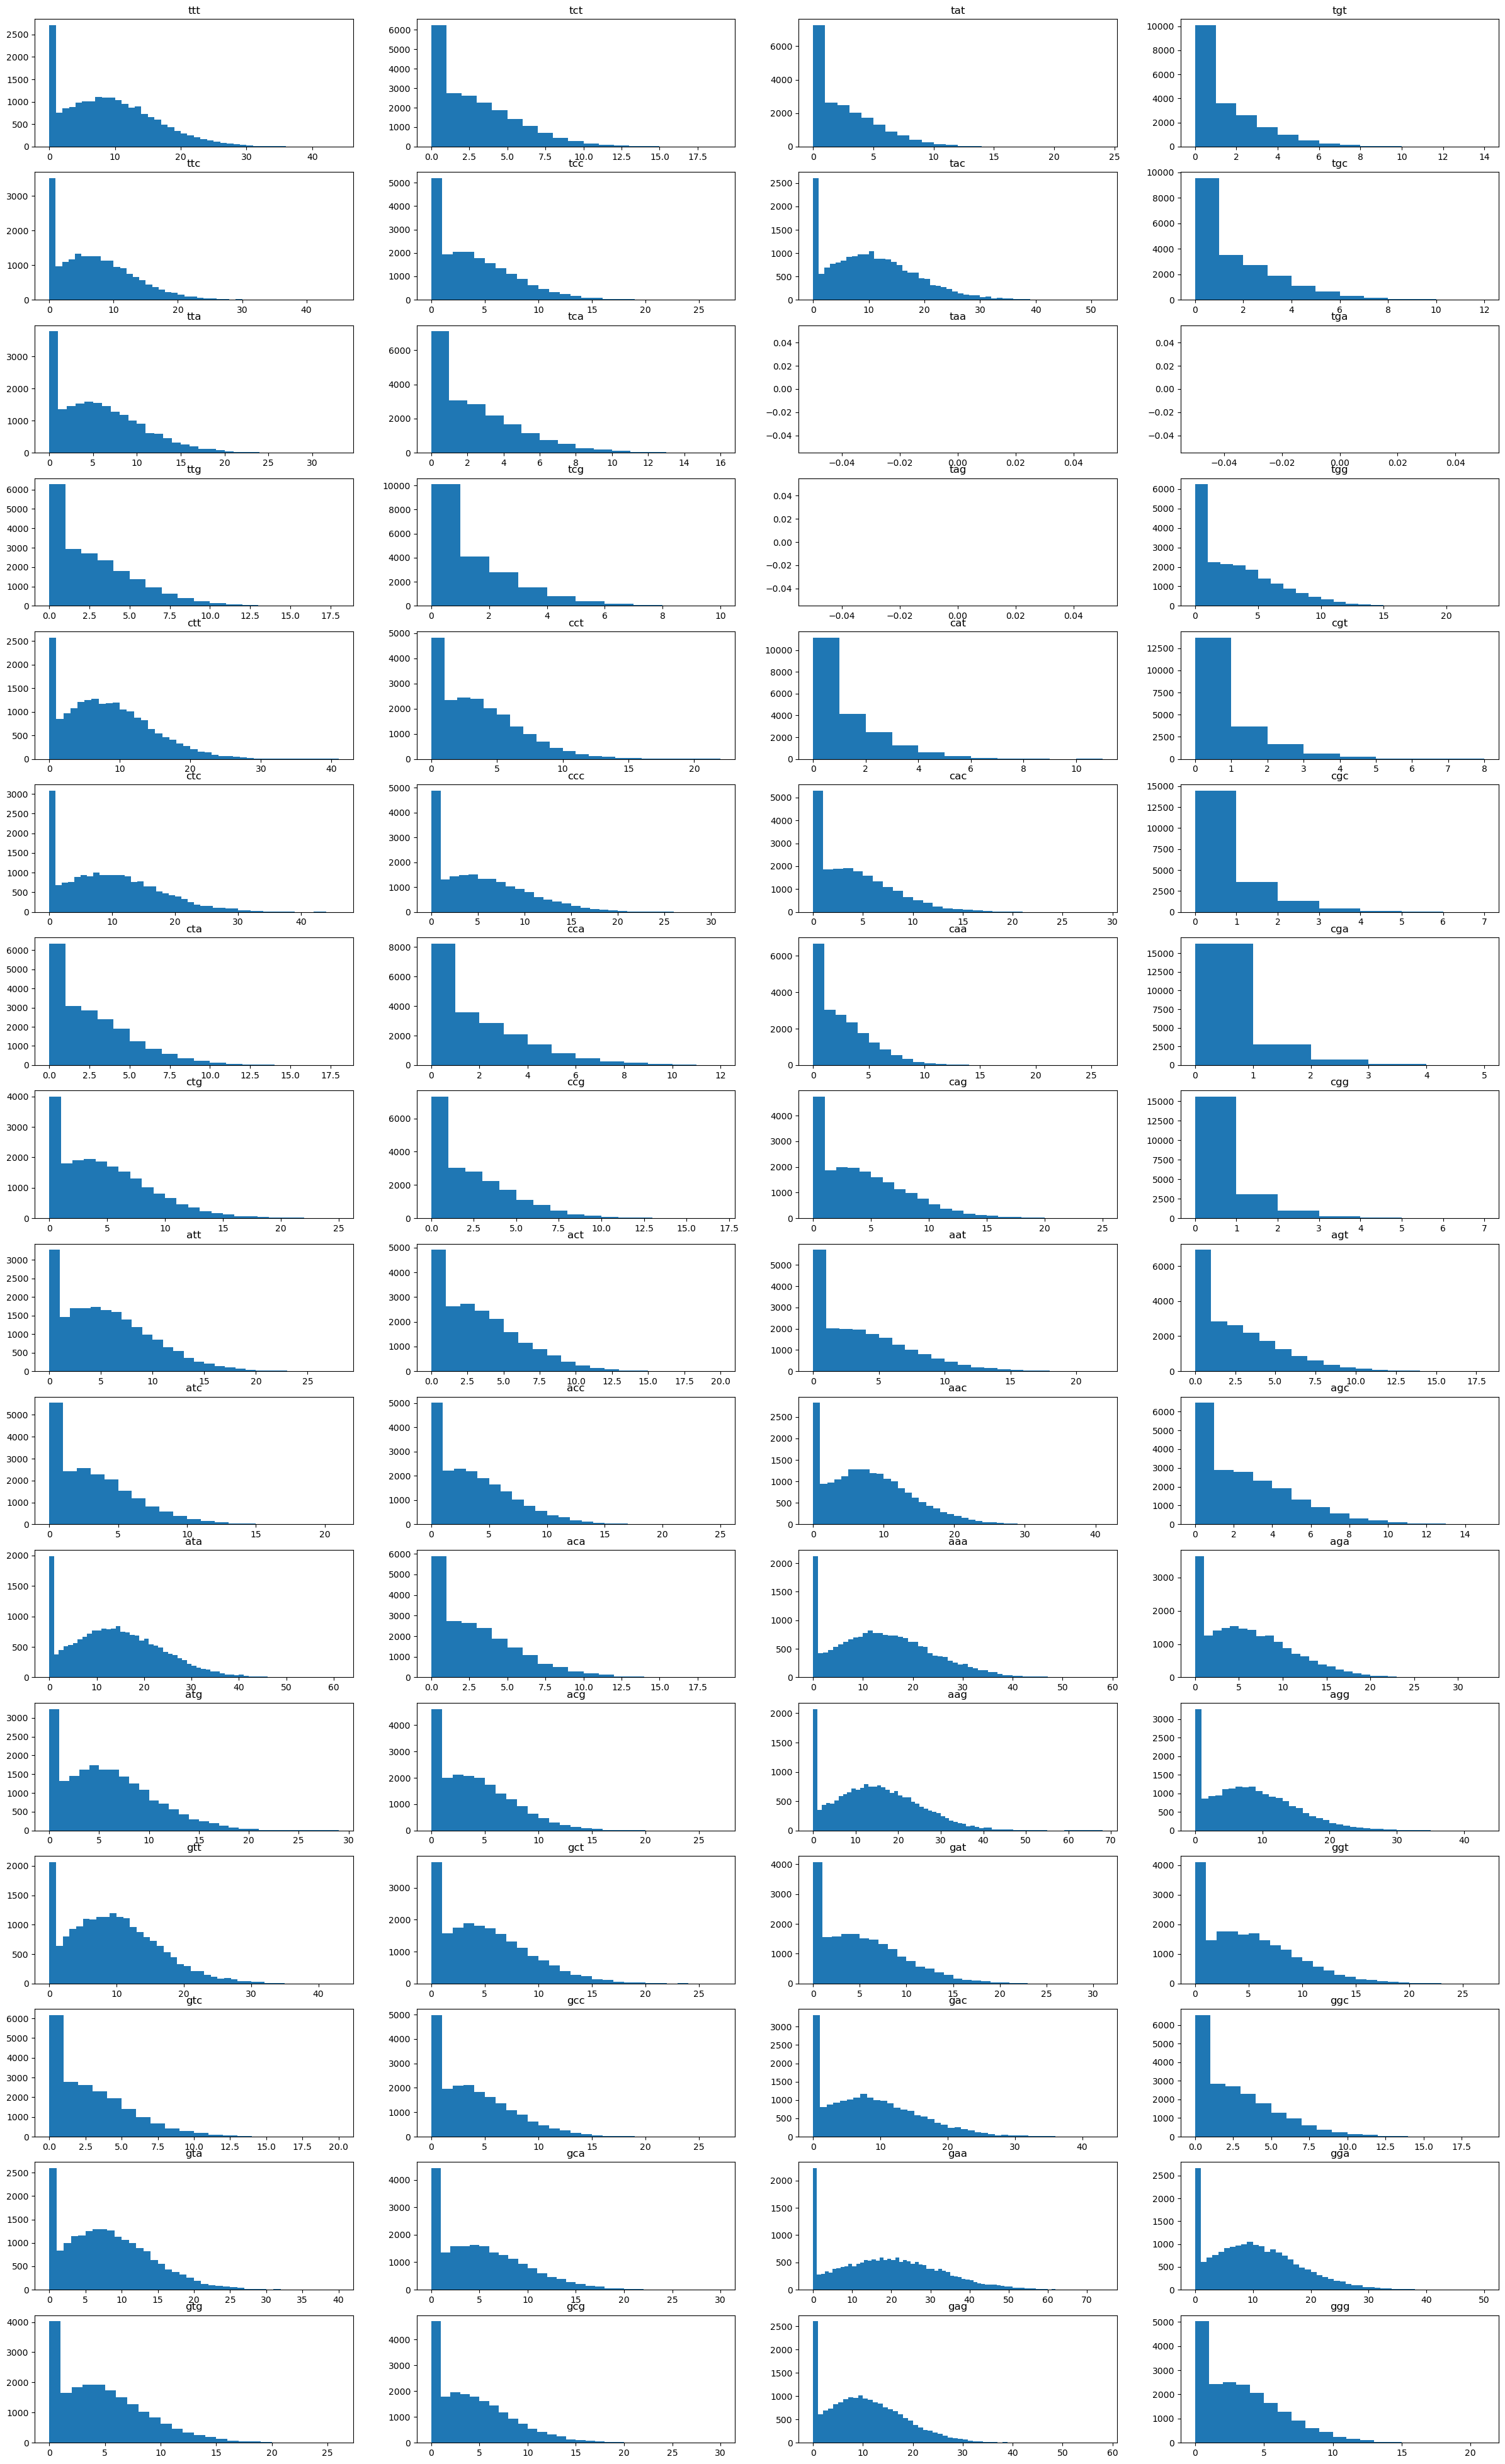

In [10]:
# print 10 thousand sequences
list_of_random_dnas = []
for i in range(20000):
    list_of_random_dnas.append(random_dna_sequence_v2(aquifex_aeolicus_VF5, 300))
    
plot_distribution_cub_generated(list_of_random_dnas)

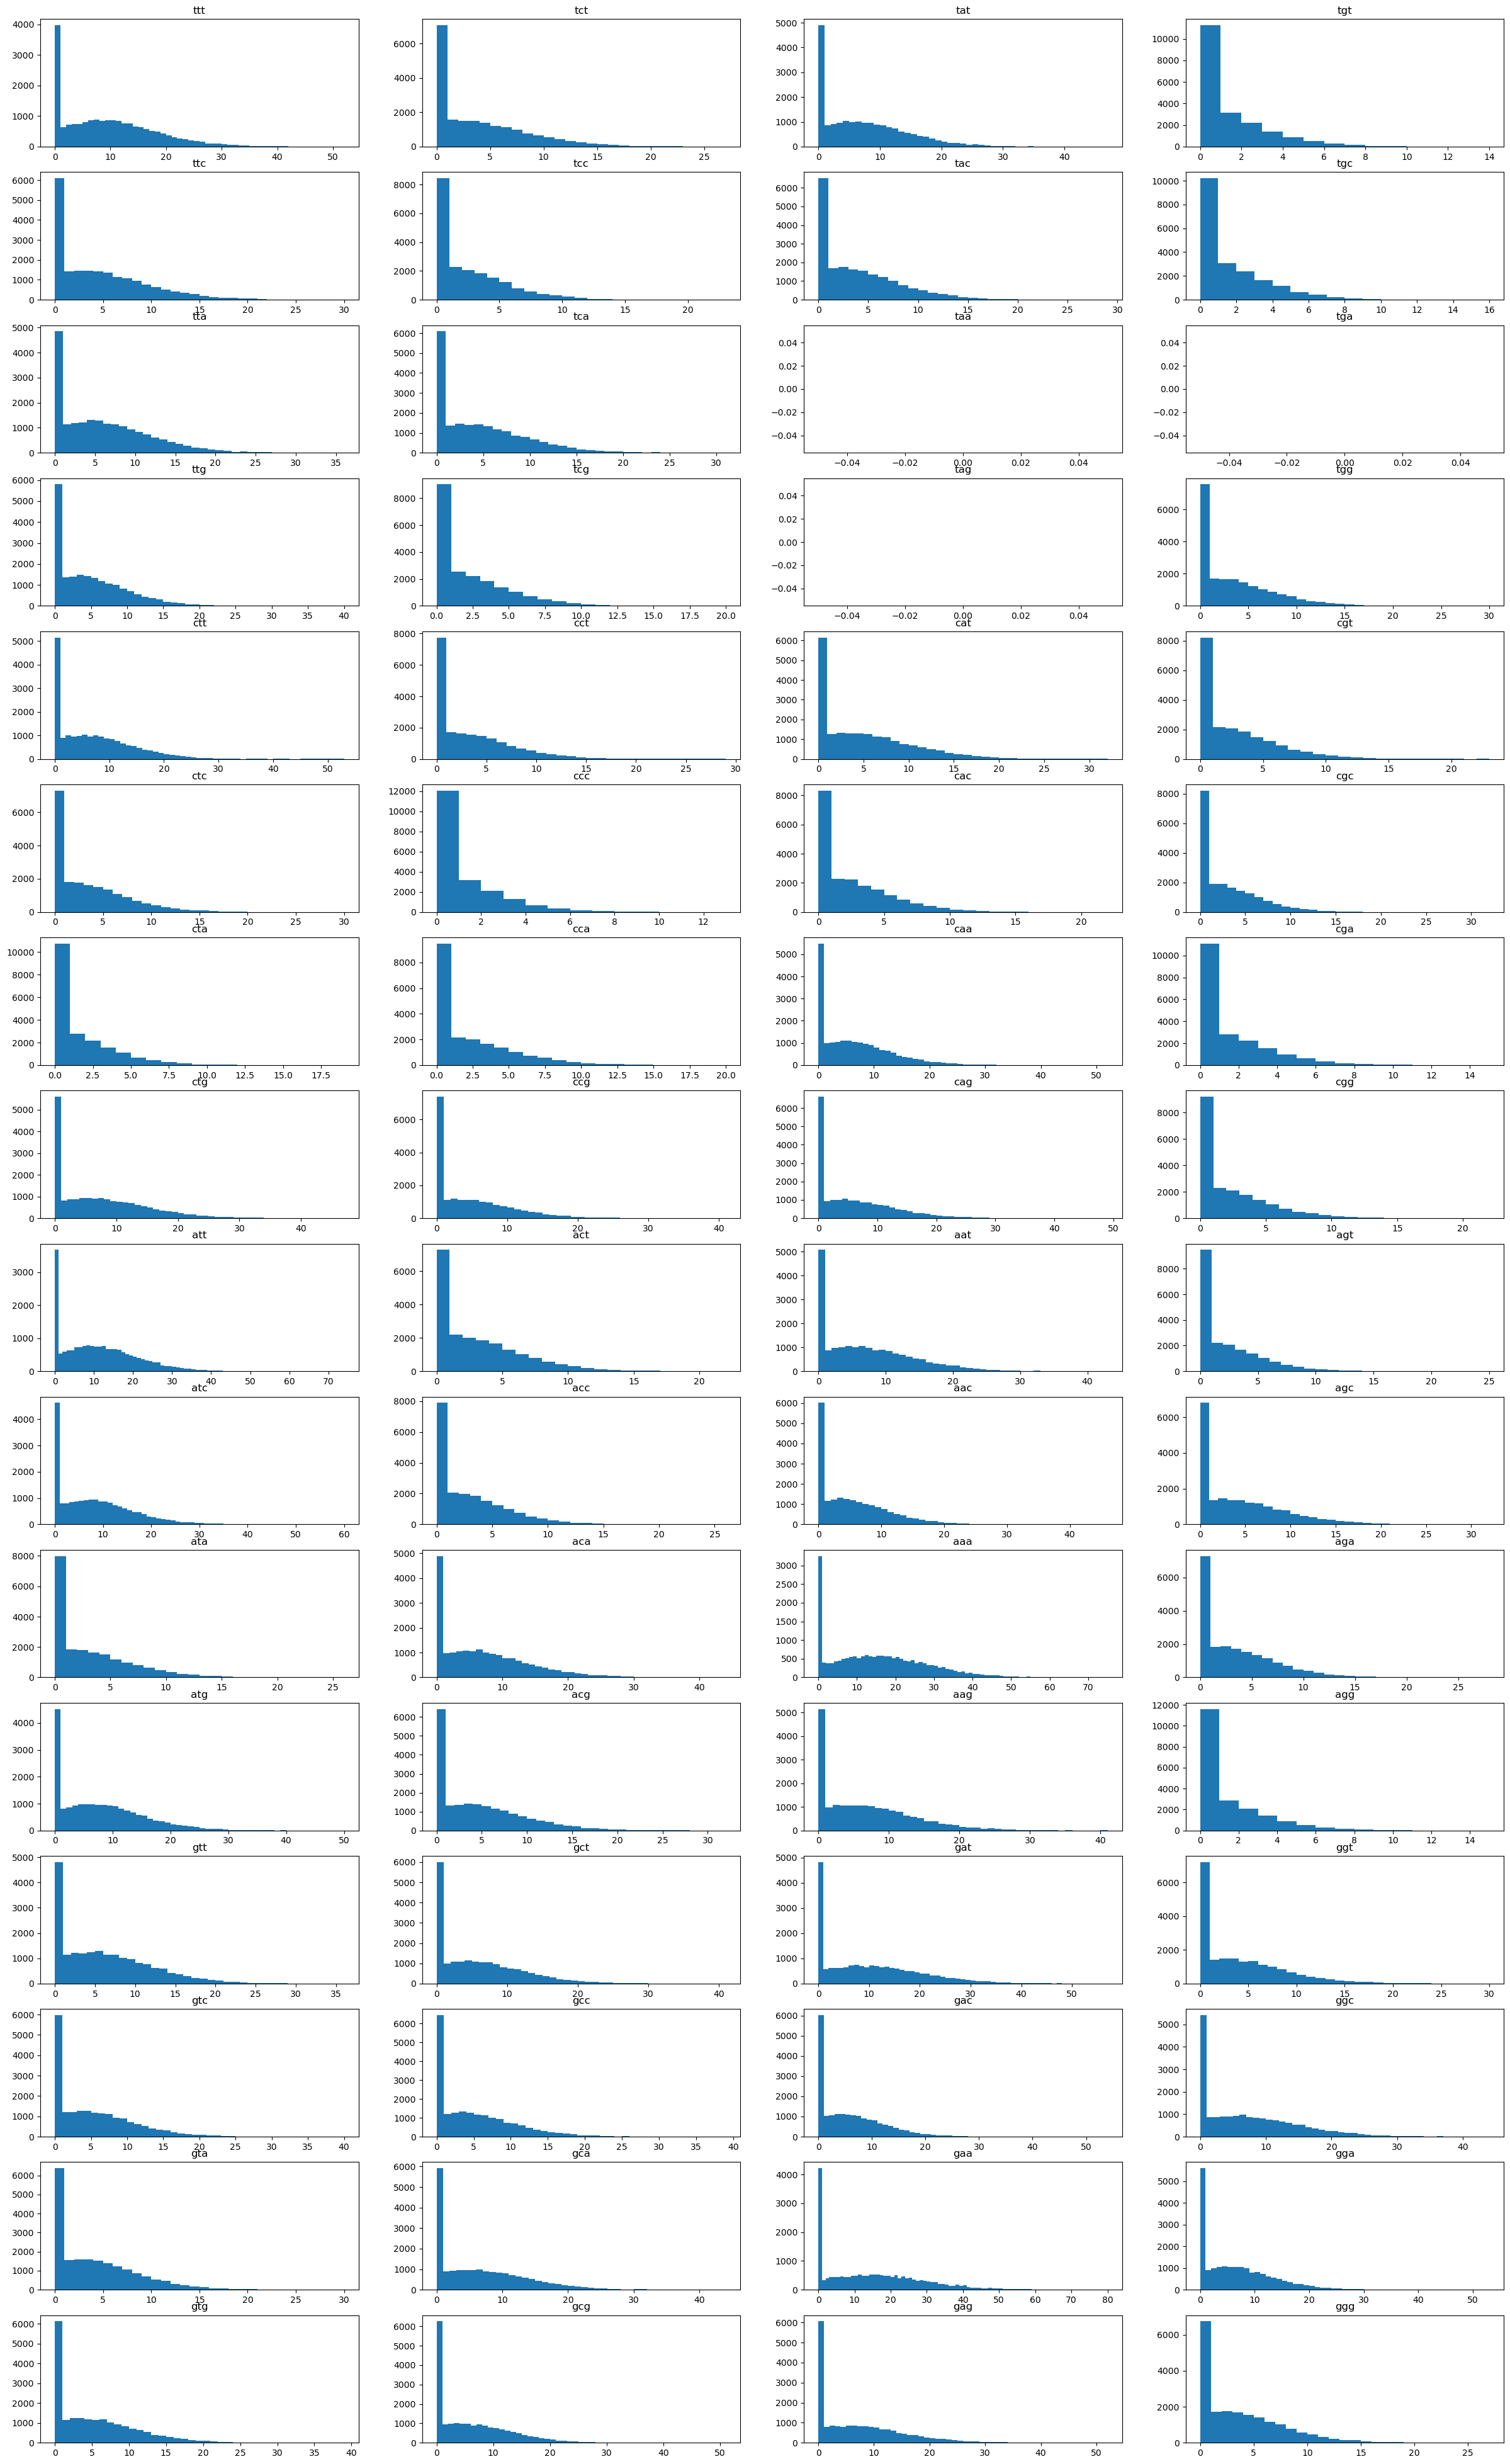

In [24]:
# print 10 thousand sequences
list_of_random_dnas = []
for i in range(20000):
    list_of_random_dnas.append(random_dna_sequence_v2(bascillus_subtillis, 300))
    
plot_distribution_cub_generated(list_of_random_dnas)

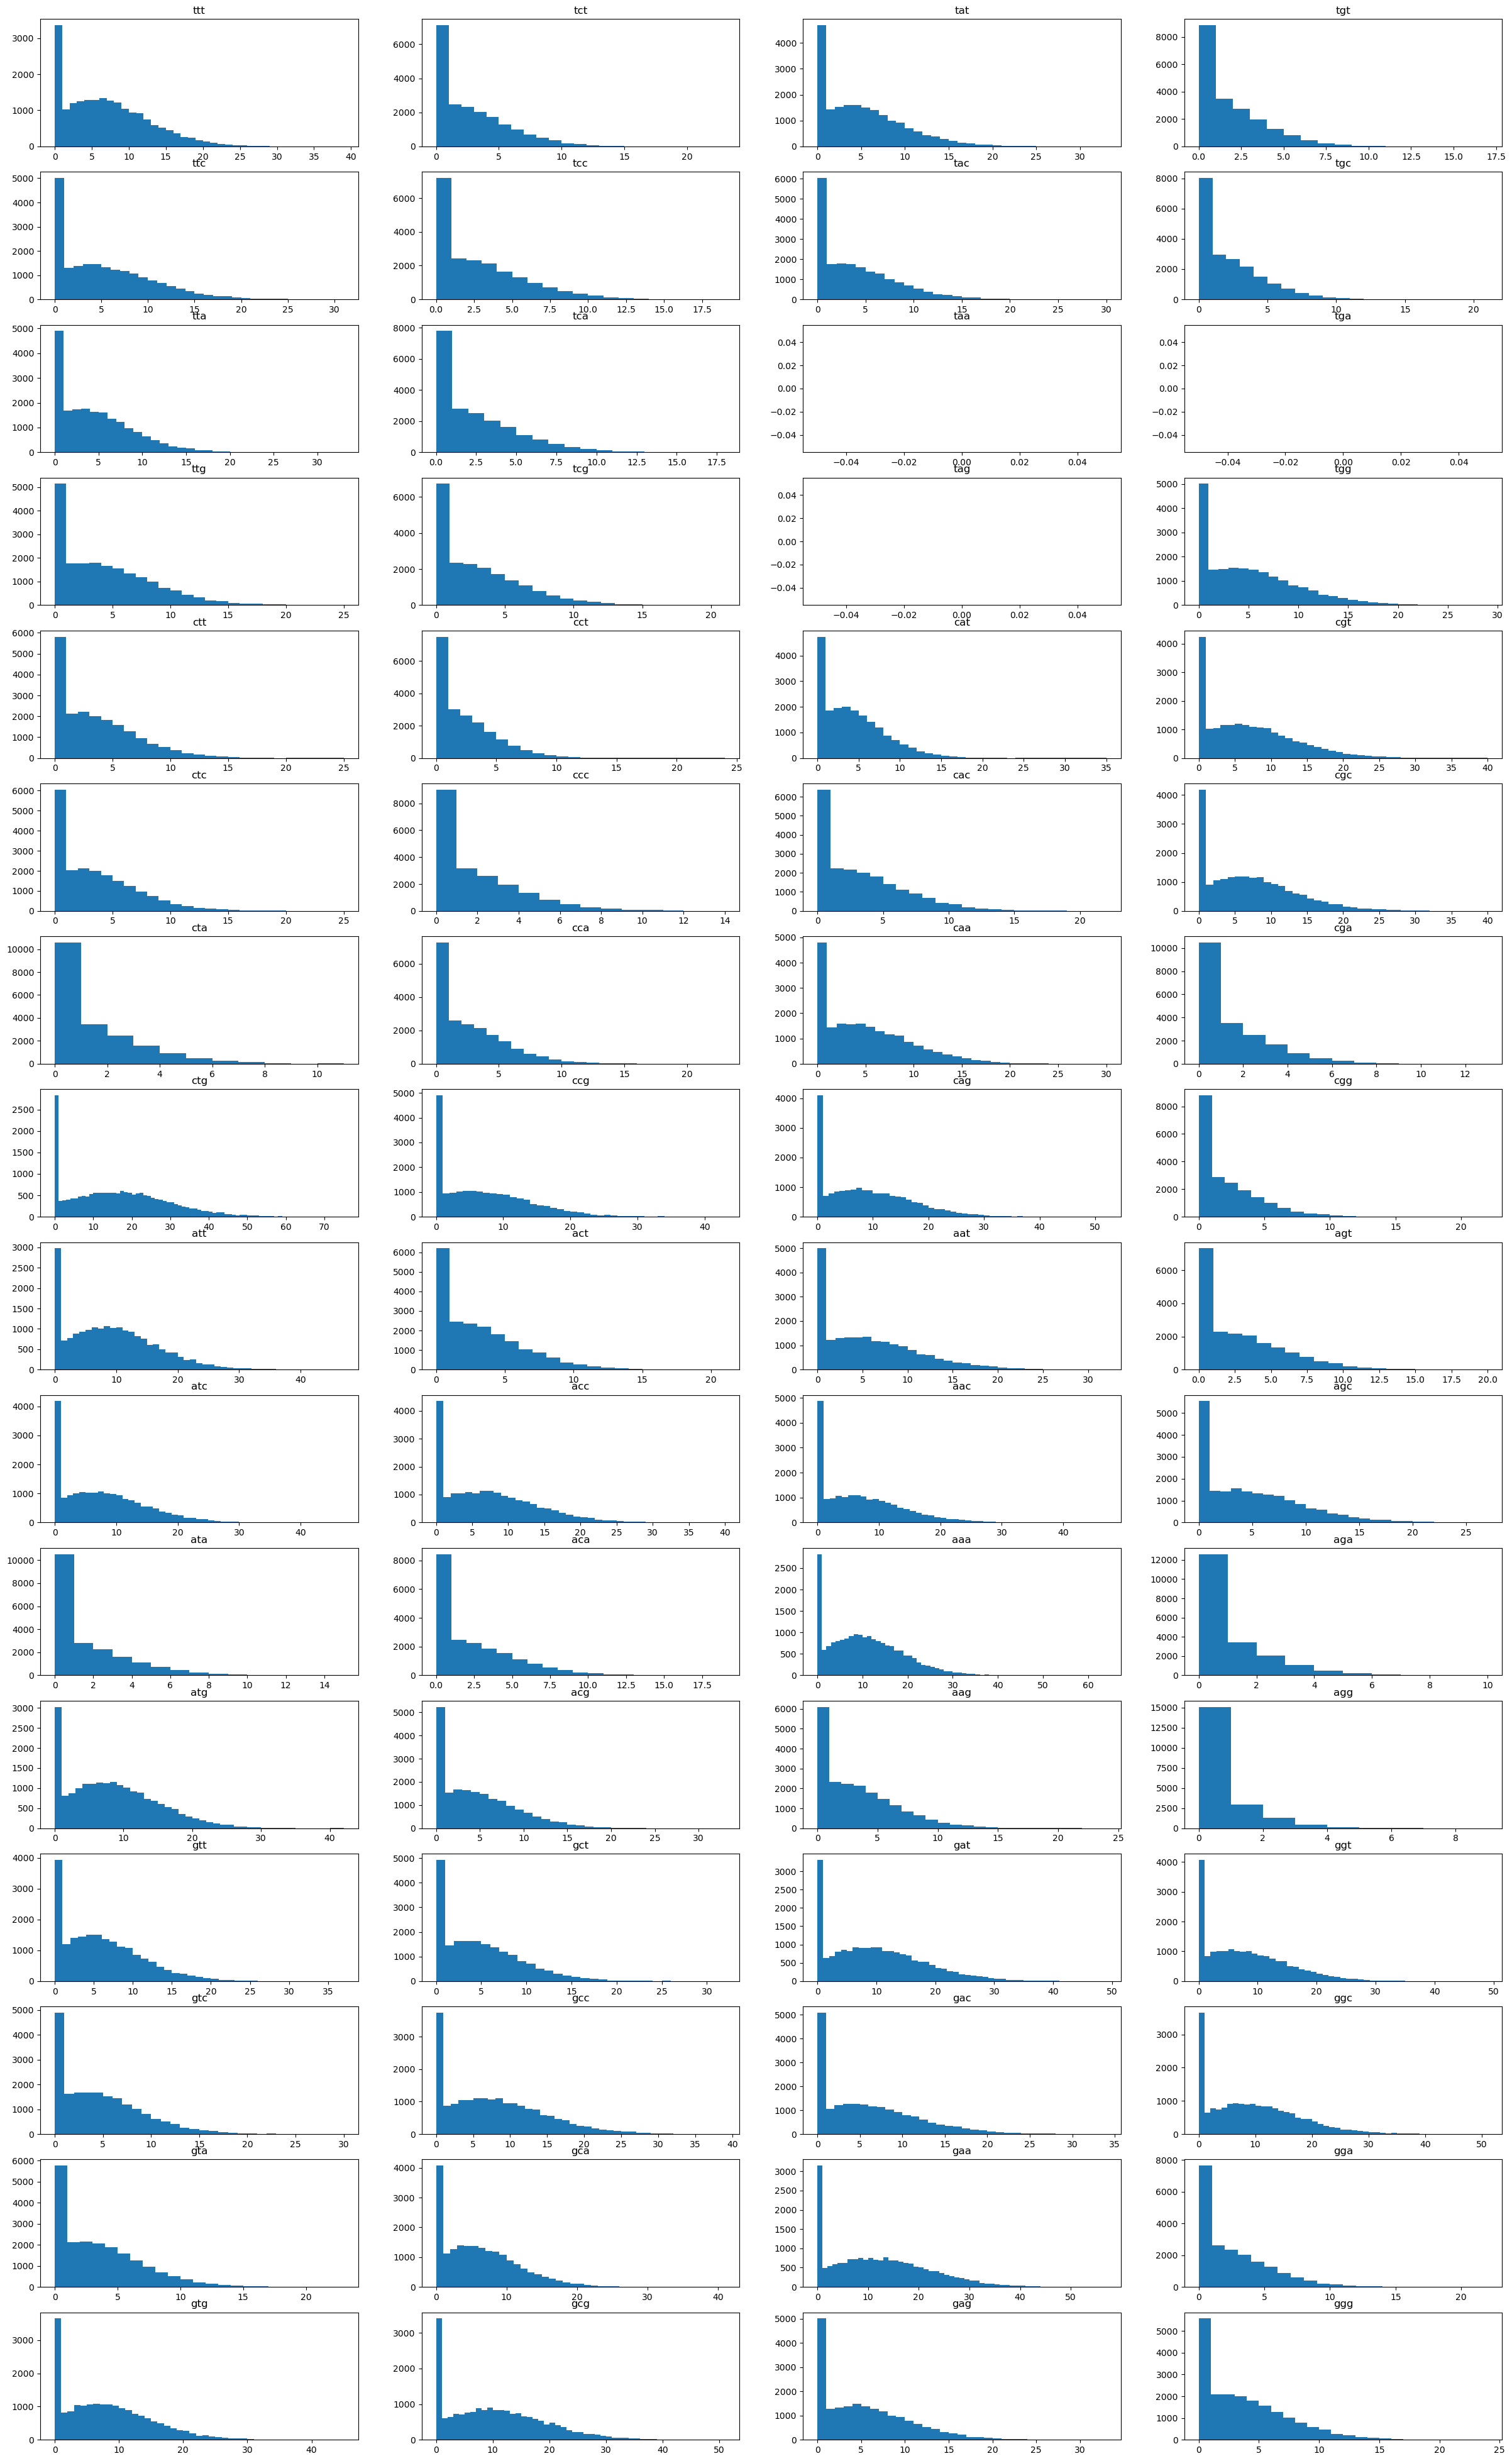

In [25]:
# print 10 thousand sequences
list_of_random_dnas = []
for i in range(20000):
    list_of_random_dnas.append(random_dna_sequence_v2(eschericia_coli_k12, 300))
    
plot_distribution_cub_generated(list_of_random_dnas)

## calculating mahalanobis distances

In [9]:
## generate sequences and create normed vector

def calculate_mean_cub_generated_normed(random_dnas):
    # calculate cub for each generated sequences
    list_of_cubs = []
    for i in range(len(random_dnas)):
        list_of_cubs.append(calc_cub(random_dnas[i]))
    # calculate cub means of 10 000 random sequences
    mean_cub_gen = {}
    for cds in CODE_COVARMAT:
        mean_cub_gen[cds.upper()] = 0
        
    for i in range(len(random_dnas)):
        curr_cub = list_of_cubs[i]
        for cds in CODE_COVARMAT:
            mean_cub_gen[cds.upper()] += curr_cub[cds.upper()]
    
    # norm
    total_codon_count = 0
    for cds in mean_cub_gen:
        total_codon_count+=mean_cub_gen[cds.upper()]
    
    for cds in mean_cub_gen:
        mean_cub_gen[cds] = mean_cub_gen[cds]*1000/total_codon_count
    
    return mean_cub_gen

In [10]:
# calculate a single Mahalnobis distance

def calculate_mahalanobis_distance(covariance_matrix, gene, genome, mean_cub_gen_normed):
    X = np.zeros((1,61))
    Xhat = np.zeros((1,61))
    for i,cds in enumerate(CODE_COVARMAT):
        X[0][i] = genome[gene]['cub'][cds.upper()]
        Xhat[0][i] = mean_cub_gen_normed[cds.upper()]
    
    # the X is normalised!
    substraction = (X*1000/np.sum(X))-Xhat
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    
    mahalonobis_distance = np.matmul(np.matmul(substraction,inverse_covariance_matrix),np.transpose(substraction))
    return mahalonobis_distance*1000

In [11]:
# calculate mahalanobis distances

def calculate_mahalanobis_distances(genome):
    ## MONTE CARLO PROCEDURE
    list_of_random_dnas = []
    for i in range(20000):
        list_of_random_dnas.append(random_dna_sequence_v2(genome, 300))
        
    mean_cub_gen_normed = calculate_mean_cub_generated_normed(list_of_random_dnas)
    
    ## CALCULATE COVARIANCE MATRIX
    # normed using cub + normed
    covarmat_v4 = np.zeros((61,61))
    # fill covariance matrix
    for i,i_tag in enumerate(CODE_COVARMAT):
        for j,j_tag in enumerate(CODE_COVARMAT):
            intermediate_sum = 0
            for locust_tag in genome.genes:
                total_codon_count_locust_tag = 0
                
                for tag in genome[locust_tag]['cub']:
                    total_codon_count_locust_tag += genome[locust_tag]['cub'][tag]
                
                diff_A = ((genome[locust_tag]['cub'][i_tag.upper()]/total_codon_count_locust_tag)*1000) - mean_cub_gen_normed[i_tag.upper()]
                diff_B = ((genome[locust_tag]['cub'][j_tag.upper()]/total_codon_count_locust_tag)*1000) - mean_cub_gen_normed[j_tag.upper()]
                intermediate_sum+=diff_A * diff_B

            covarmat_v4[i][j]= intermediate_sum

    ## CALCULATE DISTANCES
    for locust_tag in genome.genes:
        genome[locust_tag]['Mah'] = calculate_mahalanobis_distance(covarmat_v4, locust_tag,  genome, mean_cub_gen_normed)

In [12]:
calculate_mahalanobis_distances(aquifex_aeolicus_VF5)
calculate_mahalanobis_distances(eschericia_coli_k12)
calculate_mahalanobis_distances(bascillus_subtillis)

In [17]:
aquifex_aeolicus_VF5['aq_132']['Mah']

array([[61.51286455]])

In [18]:
eschericia_coli_k12['b0001']['Mah']

array([[181.22020283]])

In [19]:
bascillus_subtillis['BSU_00010']['Mah']

array([[3.37313914]])

## Defining extraneous

In [29]:
def get_potential_HGT_Mah(genome):
    genome_mean_Mah = 0
    # Calculate mean mah distance
    for genes in genome.genes:
        genome_mean_Mah += genome[genes]['Mah']
    genome_mean_Mah = genome_mean_Mah/len(genome)
    
    # calculate sum difference for std
    sum_diff = 0
    for genes in genome.genes:
        diff = genome[genes]['Mah'] - genome_mean_Mah
        diff = diff*diff
        sum_diff += diff
        
    # calc std
    genome_std_Mah = math.sqrt(sum_diff/len(genome))
    
    # extraneous is defined as:
    # whe difference from mean is 2 times more than sigma
    list_of_extraneous_Mah = []
    for genes in genome.genes:
        if genome[genes]['Mah'] - genome_mean_Mah > 2 * genome_std_Mah:
            list_of_extraneous_Mah.append(genes)
    
    return list_of_extraneous_Mah
    

In [30]:
aquifex_aeolicus_VF5_potential_hgt = get_potential_HGT_Mah(aquifex_aeolicus_VF5)
len(aquifex_aeolicus_VF5_potential_hgt)

53

In [36]:
aquifex_aeolicus_VF5.cub['ATG']

9162

In [37]:
len(aquifex_aeolicus_VF5)

1553

## Comparison of calculated mah

In [2]:
import pandas as pd
import math

In [45]:
aquae = pd.read_csv('data/HGTDB/preprocessed_data/aquae.csv')
bsub = pd.read_csv('data/HGTDB/preprocessed_data/bsub.csv')
ecoli = pd.read_csv('data/HGTDB/preprocessed_data/ecoli.csv')

In [46]:
aquae

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT
0,aq_001,0,2097,J,55.3,1.0,36.0,0.8,47.7,0.0,46.3,0.8,25.8,1,0
1,aq_005,0,1215,J,62.1,2.4,36.7,1.0,50.0,0.3,49.6,1.7,24.1,1,0
2,aq_008,0,312,J,51.4,0.2,36.2,0.9,50.5,0.4,46.0,0.7,124.8,1,0
3,aq_009,0,723,J,57.4,1.4,36.4,0.9,50.8,0.5,48.2,1.3,43.5,1,0
4,aq_011,0,597,J,52.5,0.4,31.5,-0.2,45.5,-0.4,43.2,-0.1,46.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,aq_2197,1,486,R,50.9,0.1,31.9,-0.1,46.0,-0.3,42.9,-0.1,64.0,1,0
1525,aq_2199,0,366,O,56.1,1.2,30.1,-0.5,35.8,-1.9,40.7,-0.7,84.7,1,0
1526,aq_2200,0,1635,O,60.8,2.1,35.5,0.7,41.2,-1.1,45.8,0.6,40.7,1,0
1527,aq_2203,1,636,NaN,40.4,-2.0,28.6,-0.8,41.8,-1.0,36.9,-1.8,54.8,1,0


In [47]:
bsub

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT
0,Bsu0001,0,1338,L,50.6,-0.2,32.7,-0.6,37.1,-0.9,40.1,-0.8,6.1,1,0
1,Bsu0002,0,1134,L,50.9,-0.2,34.6,-0.2,34.3,-1.3,39.9,-0.9,12.0,1,0
2,Bsu0003,0,213,S,55.6,0.7,30.6,-1.0,44.4,0.1,43.5,-0.1,39.7,1,0
3,Bsu0004,0,1110,L,57.7,1.1,31.0,-0.9,48.0,0.5,45.6,0.4,9.7,1,0
4,Bsu0005,0,156,NaN,50.9,-0.2,26.4,-1.9,39.6,-0.6,39.0,-1.1,79.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,Bsu4099,1,1377,R,59.3,1.3,35.4,0.0,42.6,-0.2,45.8,0.5,8.9,1,0
4107,Bsu4100,1,624,R,51.7,0.0,34.0,-0.3,40.2,-0.5,41.9,-0.4,21.5,1,0
4108,Bsu4101,1,783,N,45.0,-1.2,32.1,-0.7,44.7,0.1,40.6,-0.7,20.5,1,0
4109,Bsu4102,1,348,J,45.3,-1.2,29.9,-1.1,42.7,-0.2,39.3,-1.0,27.7,1,0


In [48]:
ecoli

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT
0,b0001,0,63,NaN,22.7,-5.9,68.2,6.3,63.6,1.0,51.5,0.0,422.6,1,0
1,b0002,0,2460,E,61.3,0.5,40.3,0.0,57.6,0.3,53.1,0.4,4.7,1,0
2,b0003,0,930,E,62.7,0.7,43.7,0.7,62.4,0.9,56.3,1.0,9.0,1,0
3,b0004,0,1284,E,61.3,0.5,38.2,-0.5,59.0,0.5,52.8,0.3,8.0,1,0
4,b0005,0,294,NaN,69.7,1.8,44.4,0.9,47.5,-0.9,53.9,0.5,58.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,b4399,0,1422,T,62.1,0.6,42.5,0.5,57.1,0.3,53.9,0.5,6.7,1,0
4272,b4400,0,1350,NaN,53.4,-0.8,39.9,-0.1,55.4,0.1,49.6,-0.3,10.8,1,0
4273,b4401,1,714,T,58.6,0.0,36.0,-1.0,58.6,0.4,51.0,-0.1,11.5,1,0
4274,b4402,0,138,NaN,42.6,-2.6,38.3,-0.5,46.8,-1.0,42.6,-1.8,92.5,1,0


the list comprehension is

for every genes available in HGT find a the same gene in my library and get its Mah. if not found set to None

In [49]:
aquae['calculated_mah']= [float(aquifex_aeolicus_VF5[locust_tag]['Mah']) if locust_tag in aquifex_aeolicus_VF5.genes else None for locust_tag in aquae["ID"]]
ecoli['calculated_mah']= [float(eschericia_coli_k12[locust_tag]['Mah']) if locust_tag in eschericia_coli_k12.genes else None for locust_tag in ecoli["ID"]]

In [50]:
# calculated - actual
aquae['diff'] = aquae['calculated_mah'] - aquae['Mah']
ecoli['diff'] = ecoli['calculated_mah'] - ecoli['Mah'] 
aquae['diff_squared'] = aquae['diff']*aquae['diff']
ecoli['diff_squared'] = ecoli['diff']*ecoli['diff']

In [51]:
aquae

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,calculated_mah,diff,diff_squared
0,aq_001,0,2097,J,55.3,1.0,36.0,0.8,47.7,0.0,46.3,0.8,25.8,1,0,21.218791,-4.581209,20.987480
1,aq_005,0,1215,J,62.1,2.4,36.7,1.0,50.0,0.3,49.6,1.7,24.1,1,0,22.120972,-1.979028,3.916553
2,aq_008,0,312,J,51.4,0.2,36.2,0.9,50.5,0.4,46.0,0.7,124.8,1,0,109.915955,-14.884045,221.534787
3,aq_009,0,723,J,57.4,1.4,36.4,0.9,50.8,0.5,48.2,1.3,43.5,1,0,40.943653,-2.556347,6.534912
4,aq_011,0,597,J,52.5,0.4,31.5,-0.2,45.5,-0.4,43.2,-0.1,46.3,1,0,41.977553,-4.322447,18.683552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,aq_2197,1,486,R,50.9,0.1,31.9,-0.1,46.0,-0.3,42.9,-0.1,64.0,1,0,57.194982,-6.805018,46.308267
1525,aq_2199,0,366,O,56.1,1.2,30.1,-0.5,35.8,-1.9,40.7,-0.7,84.7,1,0,78.624601,-6.075399,36.910470
1526,aq_2200,0,1635,O,60.8,2.1,35.5,0.7,41.2,-1.1,45.8,0.6,40.7,1,0,36.570526,-4.129474,17.052560
1527,aq_2203,1,636,NaN,40.4,-2.0,28.6,-0.8,41.8,-1.0,36.9,-1.8,54.8,1,0,51.783214,-3.016786,9.101000


In [52]:
ecoli

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,calculated_mah,diff,diff_squared
0,b0001,0,63,NaN,22.7,-5.9,68.2,6.3,63.6,1.0,51.5,0.0,422.6,1,0,181.333400,-241.266600,58209.572193
1,b0002,0,2460,E,61.3,0.5,40.3,0.0,57.6,0.3,53.1,0.4,4.7,1,0,2.843719,-1.856281,3.445780
2,b0003,0,930,E,62.7,0.7,43.7,0.7,62.4,0.9,56.3,1.0,9.0,1,0,5.571860,-3.428140,11.752142
3,b0004,0,1284,E,61.3,0.5,38.2,-0.5,59.0,0.5,52.8,0.3,8.0,1,0,5.095385,-2.904615,8.436789
4,b0005,0,294,NaN,69.7,1.8,44.4,0.9,47.5,-0.9,53.9,0.5,58.7,1,0,32.988357,-25.711643,661.088572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,b4399,0,1422,T,62.1,0.6,42.5,0.5,57.1,0.3,53.9,0.5,6.7,1,0,4.292106,-2.407894,5.797955
4272,b4400,0,1350,NaN,53.4,-0.8,39.9,-0.1,55.4,0.1,49.6,-0.3,10.8,1,0,6.902892,-3.897108,15.187454
4273,b4401,1,714,T,58.6,0.0,36.0,-1.0,58.6,0.4,51.0,-0.1,11.5,1,0,7.632192,-3.867808,14.959936
4274,b4402,0,138,NaN,42.6,-2.6,38.3,-0.5,46.8,-1.0,42.6,-1.8,92.5,1,0,44.546214,-47.953786,2299.565562


In [45]:
aquae.dropna(inplace=True)
ecoli.dropna(inplace=True)

In [46]:
aquae

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,calculated_mah,diff,diff_squared
0,aq_001,0,2097,J,55.3,1.0,36.0,0.8,47.7,0.0,46.3,0.8,25.8,1,0,21.008250,-4.791750,22.960867
1,aq_005,0,1215,J,62.1,2.4,36.7,1.0,50.0,0.3,49.6,1.7,24.1,1,0,22.180348,-1.919652,3.685062
2,aq_008,0,312,J,51.4,0.2,36.2,0.9,50.5,0.4,46.0,0.7,124.8,1,0,110.032616,-14.767384,218.075630
3,aq_009,0,723,J,57.4,1.4,36.4,0.9,50.8,0.5,48.2,1.3,43.5,1,0,40.945882,-2.554118,6.523518
4,aq_011,0,597,J,52.5,0.4,31.5,-0.2,45.5,-0.4,43.2,-0.1,46.3,1,0,42.081041,-4.218959,17.799619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,aq_2196,1,753,S,50.8,0.1,29.8,-0.5,47.2,-0.1,42.6,-0.2,43.0,1,0,39.096406,-3.903594,15.238046
1524,aq_2197,1,486,R,50.9,0.1,31.9,-0.1,46.0,-0.3,42.9,-0.1,64.0,1,0,57.250232,-6.749768,45.559369
1525,aq_2199,0,366,O,56.1,1.2,30.1,-0.5,35.8,-1.9,40.7,-0.7,84.7,1,0,78.360815,-6.339185,40.185266
1526,aq_2200,0,1635,O,60.8,2.1,35.5,0.7,41.2,-1.1,45.8,0.6,40.7,1,0,36.689896,-4.010104,16.080938


In [47]:
ecoli

,ID,Strand,Length,FunctionCode,GC1,SD1,GC2,SD2,GC3,SD3,GCT,SDT,Mah,AADev,HGT,calculated_mah,diff,diff_squared
1,b0002,0,2460,E,61.3,0.5,40.3,0.0,57.6,0.3,53.1,0.4,4.7,1,0,2.822392,-1.877608,3.525412
2,b0003,0,930,E,62.7,0.7,43.7,0.7,62.4,0.9,56.3,1.0,9.0,1,0,5.550860,-3.449140,11.896569
3,b0004,0,1284,E,61.3,0.5,38.2,-0.5,59.0,0.5,52.8,0.3,8.0,1,0,5.066001,-2.933999,8.608351
5,b0006,1,774,S,54.1,-0.7,34.7,-1.3,60.2,0.6,49.7,-0.3,11.4,1,0,6.932335,-4.467665,19.960032
6,b0007,1,1428,E,54.7,-0.6,45.9,1.2,59.3,0.5,53.3,0.4,7.4,1,0,4.722337,-2.677663,7.169880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,b4397,0,471,S,56.3,-0.4,37.3,-0.7,53.2,-0.2,48.9,-0.5,18.6,1,0,12.282592,-6.317408,39.909649
4270,b4398,0,687,T,62.2,0.6,39.6,-0.2,63.9,1.1,55.2,0.8,16.0,1,0,10.005693,-5.994307,35.931713
4271,b4399,0,1422,T,62.1,0.6,42.5,0.5,57.1,0.3,53.9,0.5,6.7,1,0,4.303795,-2.396205,5.741800
4273,b4401,1,714,T,58.6,0.0,36.0,-1.0,58.6,0.4,51.0,-0.1,11.5,1,0,7.596239,-3.903761,15.239346


In [61]:
sum(aquae['diff_squared'])/len(aquae)

72.42565897251303

In [62]:
math.sqrt(sum(aquae['diff_squared'])/len(aquae))

8.510326607863709

In [48]:
sum(ecoli['diff_squared'])/len(ecoli)

56.93329620743405

In [49]:
math.sqrt(sum(ecoli['diff_squared'])/len(ecoli))

7.545415575528895

# Check

## Assumption: Are my calculations following the trend of original mah?

checking if the diff i.e. real - calculated is all negative

if all negative is good

In [77]:
list_of_negative_diff = []
list_of_positive_diff = []
for locust_tag in aquae['ID']:
    if float(aquae[aquae['ID'] == locust_tag]['diff'].values) < 0:
        list_of_negative_diff.append(locust_tag)
    else:
        list_of_positive_diff.append(locust_tag)
    

In [78]:
print(len(list_of_negative_diff))
print(len(list_of_positive_diff))

1513
16


Below does not follow trend i.e. it has higher value than calculated!

In [79]:
list_of_positive_diff

['aq_018a',
 'aq_025a',
 'aq_091m',
 'aq_106a',
 'aqq_01',
 'aqq_02',
 'aq_rpmE',
 'aq_932a',
 'aq_1106a',
 'aqq_03',
 'aqq_04',
 'aq_1840a',
 'aqq_05',
 'aqq_06',
 'aq_1930b',
 'aqq_07']

## Plot Histogram of real distance distribution
The reason the paper used Montecarlo procedure is due to the fact that the distribution of the

In [35]:
aquae = pd.read_csv('data/HGTDB/preprocessed_data/aquae.csv')

In [36]:
# round to int
rounded_list =[]
for i in aquae['Mah']:
    rounded_list.append(int(i))

In [37]:
counts = []
for elem in set(rounded_list):
    counts.append(rounded_list.count(elem))

<BarContainer object of 134 artists>

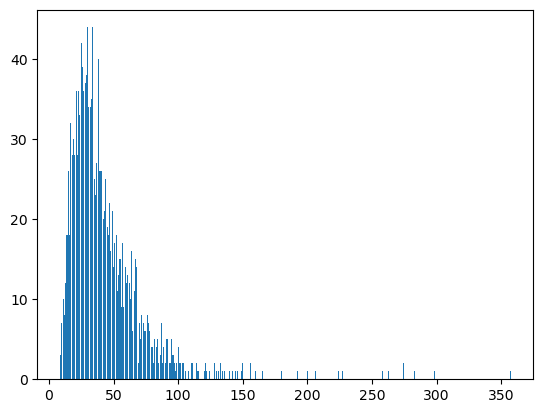

In [39]:
plt.bar(list(set(rounded_list)), counts)

# Others

In [52]:
aquae_2 = pd.read_csv('data/HGTDB/temp_data/aquae.tsv', sep='\t')

In [53]:
aquae_2

,Coordinates,Strand,Length,PID,Gene name,Synonym,FunctionCode,COG,GCRegion,HGT,...,GC3,SD3,Sim3,GCT,SDT,SimT,SimGC,Mah,SimMah,Dev.AA
0,1..2100,+,2097,15605613,fusA,aq_001,J,COG0480,,,...,47.7,0.0,0,46.3,0.8,0,0,25.8,0,
1,2117..3334,+,1215,15605614,tufA1,aq_005,J,COG0050,,,...,50.0,0.3,0,49.6,1.7,1,1,24.1,0,
2,3346..3660,+,312,15605615,rpsJ,aq_008,J,COG0051,f,f,...,50.5,0.4,0,46.0,0.7,0,0,124.8,2,+R 3.5
3,3665..4390,+,723,15605616,rplC,aq_009,J,COG0087,f,f,...,50.8,0.5,0,48.2,1.3,0,0,43.5,0,
4,4387..4986,+,597,15605617,rplD,aq_011,J,COG0088,f,f,...,45.5,-0.4,0,43.2,-0.1,0,0,46.3,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,1546519..1547007,-,486,15607128,-,aq_2197,R,COG0457,,,...,46.0,-0.3,0,42.9,-0.1,0,0,64.0,1,
1525,1547212..1547580,+,366,15607129,mopB,aq_2199,O,COG0234,,,...,35.8,-1.9,-1,40.7,-0.7,0,0,84.7,2,
1526,1547532..1549169,+,1635,15607130,mopA,aq_2200,O,COG0459,,,...,41.2,-1.1,0,45.8,0.6,0,0,40.7,0,
1527,1549193..1549831,-,636,15607131,-,aq_2203,-,-,,,...,41.8,-1.0,0,36.9,-1.8,-1,1,54.8,0,


In [7]:
# current random dna generator
def random_dna_sequence_v3(genome, length):
  if length%3!=0:
    raise ValueError('length needs to be disvisible by 3!')
  
  weights = []
  for i in CODE_COVARMAT:    
      mu, sigma = genome.mean_cub[i.upper()], genome.std_cub[i.upper()]
      s = np.random.normal(mu, sigma, 1)
      weights.append(s)
  list_of_cds = choices([cds.upper() for cds in CODE_COVARMAT.keys()], weights=weights, k=length)
  DNA=""
  for cds in list_of_cds:
    DNA+=cds
  return DNA

In [10]:
# print 10 thousand sequences
list_of_random_dnas = []
for i in range(20000):
    list_of_random_dnas.append(random_dna_sequence_v3(aquifex_aeolicus_VF5, 300))

In [11]:
list_of_random_dnas[0]

'TTTGAGAGAAAAAGGACAGAAAGACAAGTAAGATGTGTAGTTTTTTCAGCACTGGTCAGGGTCTTTATGGAAAGGGTCGTAATGGCAAGACGGGGAATTTTTGTGGGATTAGAAGATGGAGTTGTTGCAGTCATAAGAGAAGTATCAGCACGAGAGCTTAAGAACGGATGTTTTGAAATAGCTGGATCGACAGCTATAAGCGAGGTAGGAATGGATGAAAGGGTAGAGAGGTTCCAAAGGGTCAAGGAAATTAGGAAGTCTGTAAAATTCAGAAAGAGGGCAAGAGAAGTTAAGGGAAAAACGAGGCTTTCTCTAAAGATTAAGTTTGTAGAAAACGAAGGGGAAGAAGGGGGATTCAGGGGGATAGAAAACTGTCTAATGGAATTTGTAAGCAGGTTGCTGATTGTAGGAAAGTTCGTTTTGGTTAAGCTAGTCCTGGAATTTGGGGTTAGACTGTTTTCAGTCGCAGAACTTGAGGAACTGGAGGAGGAATTCAAATTTGTAGAAAAAGAAGATCTGATTCTGGAGAAGGAAAAGTGCTGCTTTGCAGGGATAGTAGTTCTTATTGGAGGGGCAGTATTTAGGAGAGAAGTGGTCGAATGTGTAAGGATTGAAAGGAAGGTTGAAAGCGTAAGAGTAAGCGAAGCTATGCTTTGTGGAAAGGCTGAGCTTGTAAGAGAAATGCTTGGATTAGAAGTTAAGAAGCAAGTAAACAAGAAGGAACTTTCTGTCAGGGTAGAAGTAATAGTCGTTAACAACGAGGAGCACGTAGGGAACGGGCTGGTTCTAATGGGGGGAGTTAGCGGGTTCGAAAAGCGGGAGGAGGTAGTAGTTGTTCAATTGATAAAAGAGAAGAGGGGAAGGCTGGTCGTAGTAGCAGTTTGCATAATATTTATGACA'

In [12]:
list_of_random_dnas[2]

'GAGAAACCCCAAAAGTTATTGCTTGCAATAAGTTCCCTCTCCGAATATGAGGGAAGTGTAGAGCTTGAACTTATAGAGGAGGTAACCCCCATCTGTGTGGCTGAGGAATTTGGAAGGGGCTCTAAGTTCGAGGTGAGGACAGAGGAGACTGCTACACCCATACAGTCGTTTTTAATAGTGACCAAGATAGGGCTCAGGGGCCTCTTTATATACGAAGCATTTGAATACGAGGTGGAATTCATTGAGAACCTTCAGTATATAGAAAGCGAACTTGTTTTGGTAATAGTTGCACTTACAATACTGTGGGTGTTTGAGGAAATAATAGAAGCTCCCATATCGACACCAAAAAACTTTTTTATTGGAATTTCCAAGAAGAGGGAGTGGAGGGGCCCGTTCTTTTGCAACTTTTTCTTTGCAGGAATAGCAGAAAACCCCGAATACCTTTTAGTATTCGAGAACGTAGGGTATTTAGAGCTCTACGGGGAAGCAGGAATAGGAGTTGAACCCGGATGGCTAGCGGGGATTGTGAAGAACCTGAGGTCGCAACCGTGCCTTGAATTTGGACTCGAATTTCCCATTTTTGAGCTCGAAGGGATAATACCCAAGGATAACTTGAACATATTTCTTGAAAAGCTCAACGAGAACGAAACAATACTCCAGCCCGAGCCAATAGTAAAAGGAGAGAACGAAAAAATACAGTTTATTCTTTCGAACTTATACCTCATAGCGGAGTTAAAAGATTTTCCCATATGGCAACTTAAGAACTACTTGGAGAACTACATAAGTGTTGGCATGAGGGATCCCATTTTTAACGGAAAGAAGGCTTTTACATGTGAAAAAGTGACCCTCGAGGTGACTATAATAATTTTAAAGCCCACCTACATACGTGAAGTGCAAACT'